### 데이터 불러오기 & 전처리

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
import warnings
warnings.filterwarnings("ignore", category = RuntimeWarning)

In [2]:
house_df_org = pd.read_csv(r"C:\data\house_train.csv")
house_df = house_df_org.copy()
house_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

C:\Users\sbpark\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'original sale price histogram'}, xlabel='SalePrice', ylabel='Density'>

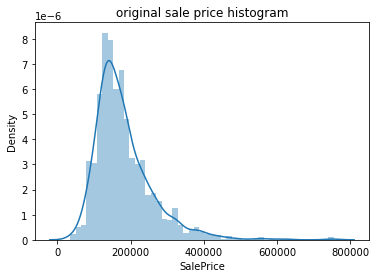

In [4]:
plt.title('original sale price histogram')
sns.distplot(house_df['SalePrice'])

C:\Users\sbpark\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'log transform sale price histogram'}, xlabel='SalePrice', ylabel='Density'>

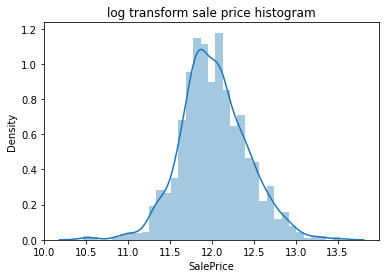

In [5]:
plt.title('log transform sale price histogram')
log_SalePrice = np.log1p(house_df['SalePrice'])
sns.distplot(log_SalePrice)

In [6]:
#널 값 전처리 및 안쓰는 피쳐 삭제

original_SalePrice = house_df['SalePrice']
house_df['SalePrice'] = np.log1p(house_df['SalePrice'])


house_df.drop(['Id','PoolQC','MiscFeature','Alley','Fence','FireplaceQu'],axis = 1, inplace = True)
house_df.fillna(house_df.mean(),inplace = True)

In [7]:
null_column_count = house_df.isnull().sum()[house_df.isnull().sum() > 0]
print("null 피쳐의 type : \n", house_df.dtypes[null_column_count.index])

null 피쳐의 type : 
 MasVnrType      object
BsmtQual        object
BsmtCond        object
BsmtExposure    object
BsmtFinType1    object
BsmtFinType2    object
Electrical      object
GarageType      object
GarageFinish    object
GarageQual      object
GarageCond      object
dtype: object


In [8]:
#원핫인코딩

print("getdummy() 수행전 데이터 shape : ", house_df.shape)
house_df_ohe = pd.get_dummies(house_df)
print("getdummy() 수행후 데이터 shape : ", house_df_ohe.shape)

null_column_count = house_df_ohe.isnull().sum()[house_df_ohe.isnull().sum() > 0]
print("null 피쳐의 type : \n", house_df_ohe.dtypes[null_column_count.index])

getdummy() 수행전 데이터 shape :  (1460, 75)
getdummy() 수행후 데이터 shape :  (1460, 271)
null 피쳐의 type : 
 Series([], dtype: object)


In [9]:
house_df_ohe.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,1,0,0,0,0,1,0


### 선형 회귀 모델 학습/예측/평가

In [10]:
from sklearn.metrics import mean_squared_error

def get_rmse(model):
    pred = model.predict(X_test)
    mse = mean_squared_error(y_test,pred)
    rmse = np.sqrt(mse)
    print(model.__class__.__name__, '로그변환된 rmse : ', np.round(rmse, 3))
    return rmse


def get_rmses(models):
    rmses = []
    for model in models:
        rmse = get_rmse(model)
        rmses.append(rmse)
    return rmses



In [11]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, GridSearchCV

y_target = house_df_ohe['SalePrice']
X_features = house_df_ohe.drop('SalePrice', axis = 1, inplace = False)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size = 0.2, random_state = 156)

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)


models = [lr_reg, ridge_reg,lasso_reg ]
get_rmses(models)

LinearRegression 로그변환된 rmse :  0.132
Ridge 로그변환된 rmse :  0.128
Lasso 로그변환된 rmse :  0.176


[0.13189576579154577, 0.1275084633405305, 0.17628250556471395]

In [12]:
def get_top_bottom_coef(model, n = 10):
    coef = pd.Series(model.coef_, index =X_features.columns)
    
    coef_high = coef.sort_values(ascending = False).head(n)
    coef_low = coef.sort_values(ascending = False).tail(n)
    return coef_high, coef_low



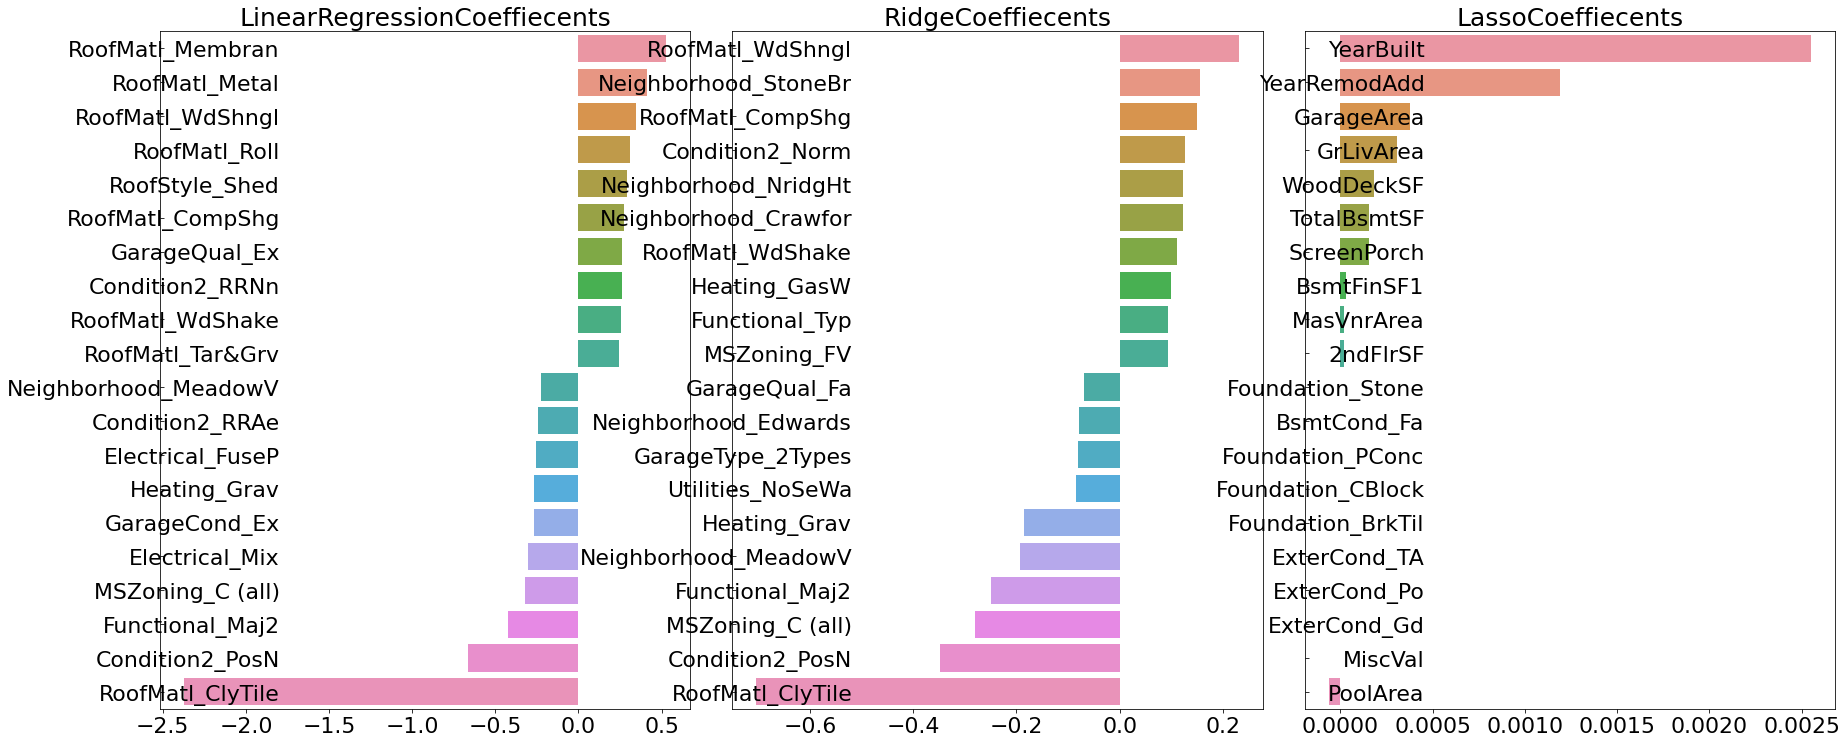

In [13]:
def visualize_coefficient(models):
    fig, axs = plt.subplots(figsize = (24,10), nrows = 1 , ncols = 3)
    fig.tight_layout()
    
    for i_num, model in enumerate(models):
        coef_higt, coef_low = get_top_bottom_coef(model)
        coef_concat = pd.concat([coef_higt, coef_low])
        
        axs[i_num].set_title(model.__class__.__name__+'Coeffiecents', size = 25)
        axs[i_num].tick_params(axis = "y", direction = "in", pad = -120)
        for label in (axs[i_num].get_xticklabels() + axs[i_num].get_yticklabels()):
            label.set_fontsize(22)
        sns.barplot(x = coef_concat.values, y = coef_concat.index, ax = axs[i_num])
        

        
models = [lr_reg, ridge_reg,lasso_reg ]
visualize_coefficient(models)

In [14]:
from sklearn.model_selection import cross_val_score

def get_avg_rmse_cv(models):
    for model in models:
        rmse_list = np.sqrt(-cross_val_score(model, X_features, y_target, scoring = "neg_mean_squared_error", cv = 5))
        rmse_avg = np.mean(rmse_list)
        
        print("\n{0} cv rmse 값 리스트 {1}".format(model.__class__.__name__,np.round(rmse_list,3)))
        print("\n{0} cv  평균 rmse 리스트 {1}".format(model.__class__.__name__,np.round(rmse_avg,3)))
        
models = [lr_reg, ridge_reg,lasso_reg ]
get_avg_rmse_cv(models)


LinearRegression cv rmse 값 리스트 [0.135 0.165 0.168 0.111 0.198]

LinearRegression cv  평균 rmse 리스트 0.155

Ridge cv rmse 값 리스트 [0.117 0.154 0.142 0.117 0.189]

Ridge cv  평균 rmse 리스트 0.144

Lasso cv rmse 값 리스트 [0.161 0.204 0.177 0.181 0.265]

Lasso cv  평균 rmse 리스트 0.198


In [15]:
from sklearn.model_selection import GridSearchCV

def print_best_params(model, params):
    grid_model = GridSearchCV(model, param_grid = params, scoring = "neg_mean_squared_error", cv = 5)
    grid_model.fit(X_features, y_target)
    rmse = np.sqrt(-1 * grid_model.best_score_)
    print("{0} 5 cv 최적 평균 rmse 값 : {1}, 최적 alpha : {2}".format(model.__class__.__name__, np.round(rmse,4), grid_model.best_params_))
    
ridge_params = {'alpha' : [0.05,0.1,1,5,8,10,12,15,20]}
lasso_params = {'alpha' : [0.001,0.005,0.008,0.05,0.03,0.1,0.5,1,5,10]}

print_best_params(ridge_reg, ridge_params)
print_best_params(lasso_reg, lasso_params)

Ridge 5 cv 최적 평균 rmse 값 : 0.1418, 최적 alpha : {'alpha': 12}
Lasso 5 cv 최적 평균 rmse 값 : 0.142, 최적 alpha : {'alpha': 0.001}


LinearRegression 로그변환된 rmse :  0.132
Ridge 로그변환된 rmse :  0.124
Lasso 로그변환된 rmse :  0.12


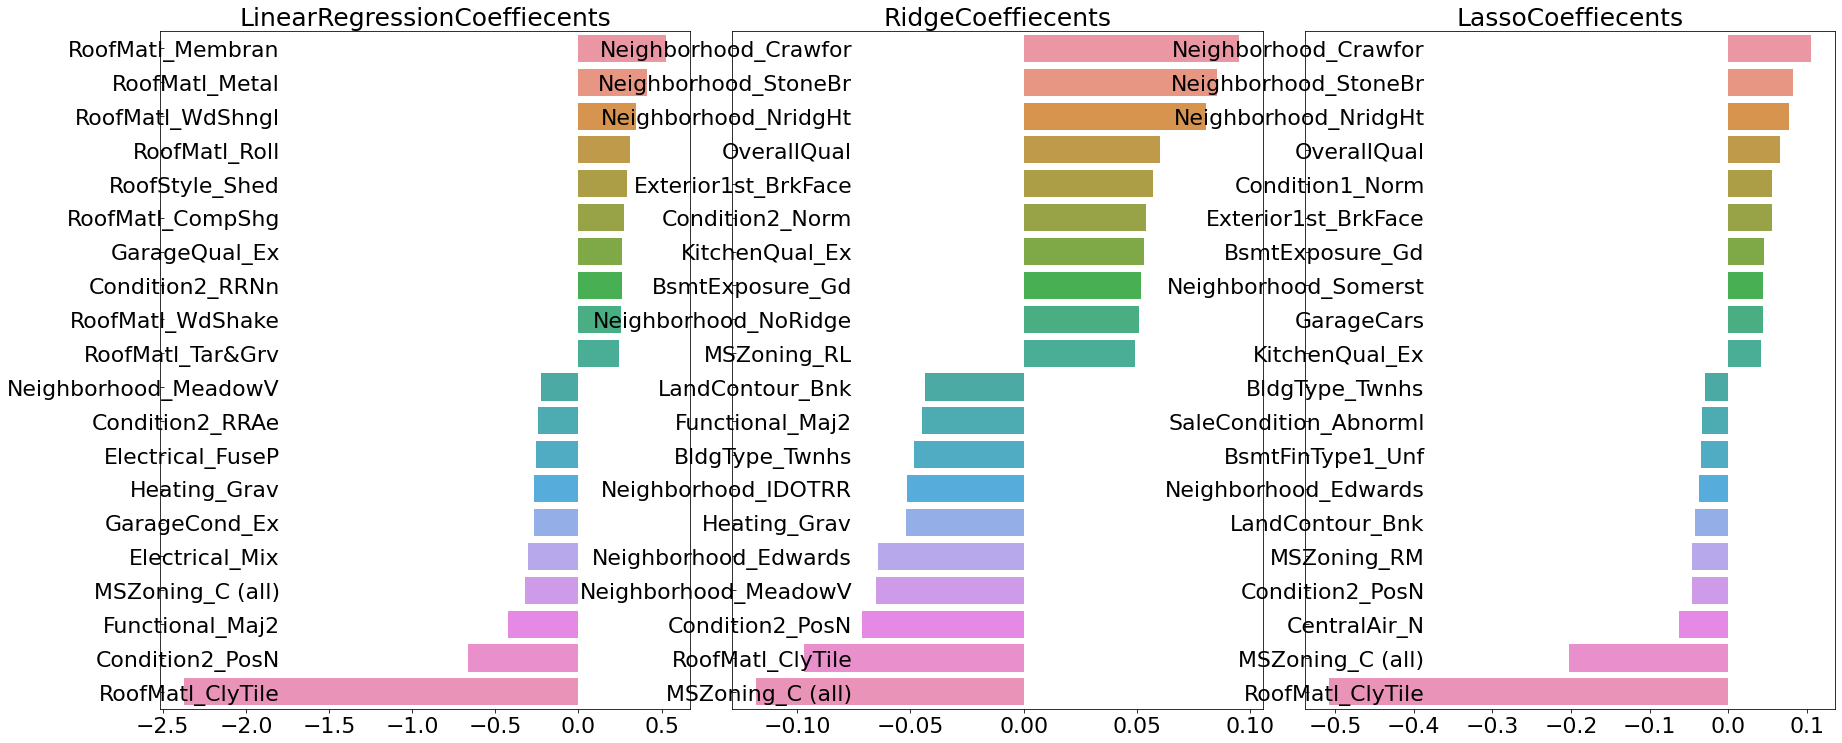

In [16]:
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
ridge_reg = Ridge(alpha = 12)
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso(alpha = 0.001)
lasso_reg.fit(X_train, y_train)

models = [lr_reg, ridge_reg,lasso_reg ]
get_rmses(models)

models = [lr_reg, ridge_reg,lasso_reg ]
visualize_coefficient(models)

### 데이터 추가 가공 및 모델 튜닝

In [17]:
from scipy.stats import skew

features_index = house_df.dtypes[house_df.dtypes != 'object'].index

skew_features = house_df[features_index].apply(lambda x : skew(x))

skew_features_top = skew_features[skew_features > 1]
print(skew_features_top.sort_values(ascending = False))

MiscVal          24.451640
PoolArea         14.813135
LotArea          12.195142
3SsnPorch        10.293752
LowQualFinSF      9.002080
KitchenAbvGr      4.483784
BsmtFinSF2        4.250888
ScreenPorch       4.117977
BsmtHalfBath      4.099186
EnclosedPorch     3.086696
MasVnrArea        2.673661
LotFrontage       2.382499
OpenPorchSF       2.361912
BsmtFinSF1        1.683771
WoodDeckSF        1.539792
TotalBsmtSF       1.522688
MSSubClass        1.406210
1stFlrSF          1.375342
GrLivArea         1.365156
dtype: float64


In [18]:
house_df[skew_features_top.index] = np.log1p(house_df[skew_features_top.index])

In [19]:
house_df_ohe = pd.get_dummies(house_df)

y_target = house_df_ohe['SalePrice']
X_features = house_df_ohe.drop('SalePrice', axis = 1, inplace = False)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size = 0.2, random_state = 156)

ridge_params = {'alpha' : [0.05,0.1,1,5,8,10,12,15,20]}
lasso_params = {'alpha' : [0.001,0.005,0.008,0.05,0.03,0.1,0.5,1,5,10]}

print_best_params(ridge_reg, ridge_params)
print_best_params(lasso_reg, lasso_params)

Ridge 5 cv 최적 평균 rmse 값 : 0.1275, 최적 alpha : {'alpha': 10}
Lasso 5 cv 최적 평균 rmse 값 : 0.1252, 최적 alpha : {'alpha': 0.001}


LinearRegression 로그변환된 rmse :  0.128
Ridge 로그변환된 rmse :  0.122
Lasso 로그변환된 rmse :  0.119


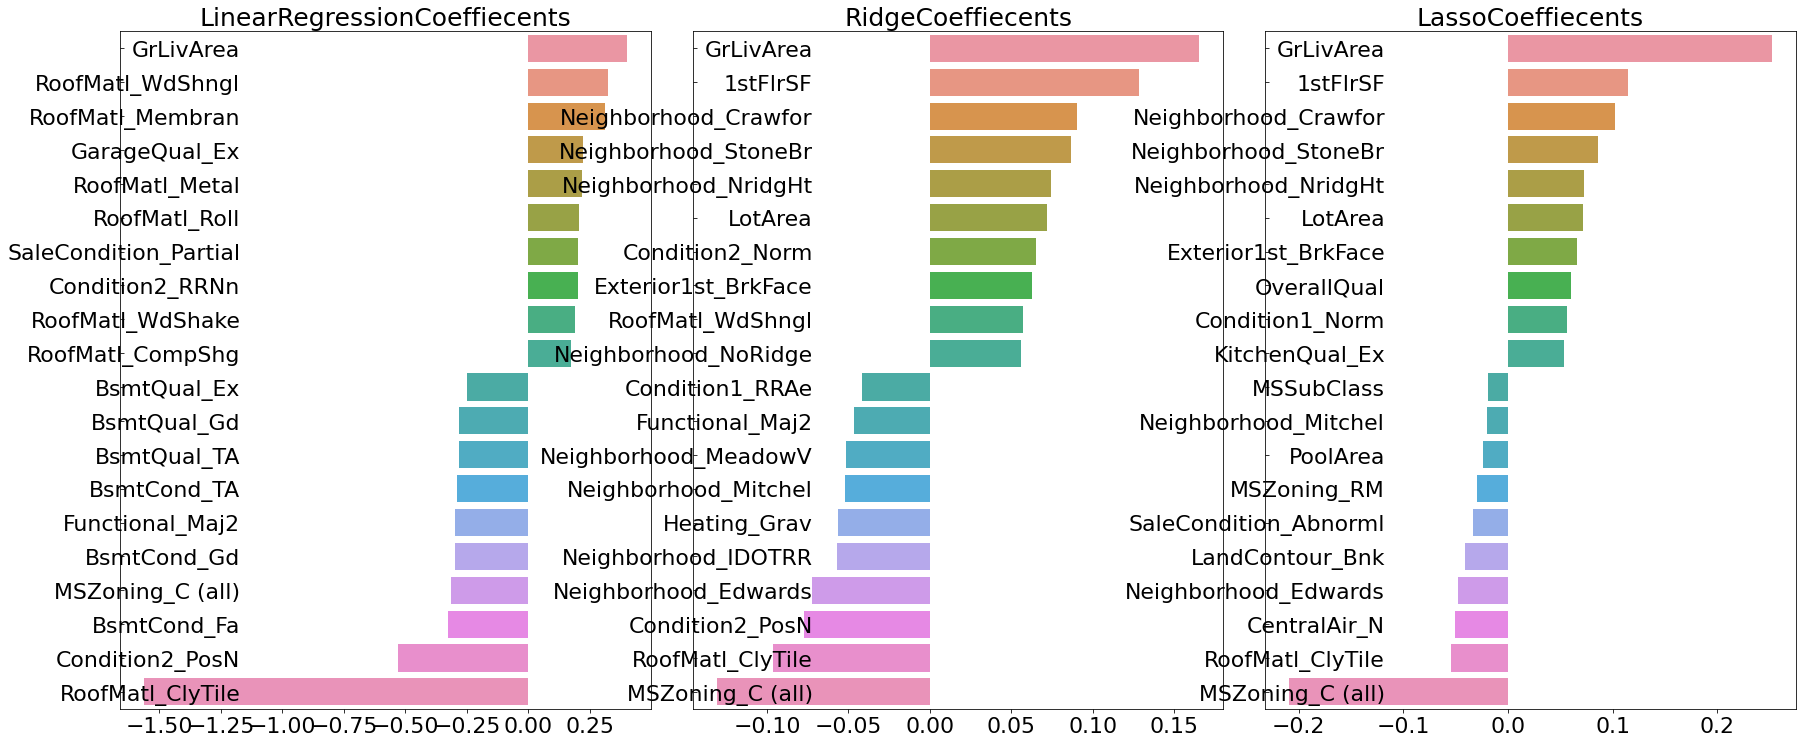

In [20]:
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
ridge_reg = Ridge(alpha = 10)
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso(alpha = 0.001)
lasso_reg.fit(X_train, y_train)

models = [lr_reg, ridge_reg,lasso_reg ]
get_rmses(models)

models = [lr_reg, ridge_reg,lasso_reg ]
visualize_coefficient(models)

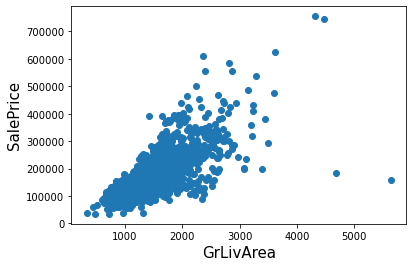

In [21]:
plt.scatter(x = house_df_org['GrLivArea'], y = house_df_org['SalePrice'])
plt.ylabel('SalePrice', fontsize = 15)
plt.xlabel('GrLivArea', fontsize = 15)
plt.show()

In [22]:
cond1 = house_df_ohe['GrLivArea'] > np.log1p(4000)
cond2 = house_df_ohe['SalePrice'] < np.log1p(500000)
outlier_index = house_df_ohe[cond1 & cond2].index

print("이상치 레코드 인덱스 : ", outlier_index.values)
print("이상치 삭제전 : ", house_df_ohe.shape)

house_df_ohe.drop(outlier_index, axis = 0, inplace = True)
print("이상치 삭제후 : ", house_df_ohe.shape)

이상치 레코드 인덱스 :  [ 523 1298]
이상치 삭제전 :  (1460, 271)
이상치 삭제후 :  (1458, 271)


In [23]:
y_target = house_df_ohe['SalePrice']
X_features = house_df_ohe.drop('SalePrice', axis = 1, inplace = False)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size = 0.2, random_state = 156)

ridge_params = {'alpha' : [0.05,0.1,1,5,8,10,12,15,20]}
lasso_params = {'alpha' : [0.001,0.005,0.008,0.05,0.03,0.1,0.5,1,5,10]}

print_best_params(ridge_reg, ridge_params)
print_best_params(lasso_reg, lasso_params)

Ridge 5 cv 최적 평균 rmse 값 : 0.1125, 최적 alpha : {'alpha': 8}
Lasso 5 cv 최적 평균 rmse 값 : 0.1122, 최적 alpha : {'alpha': 0.001}


LinearRegression 로그변환된 rmse :  0.129
Ridge 로그변환된 rmse :  0.103
Lasso 로그변환된 rmse :  0.1


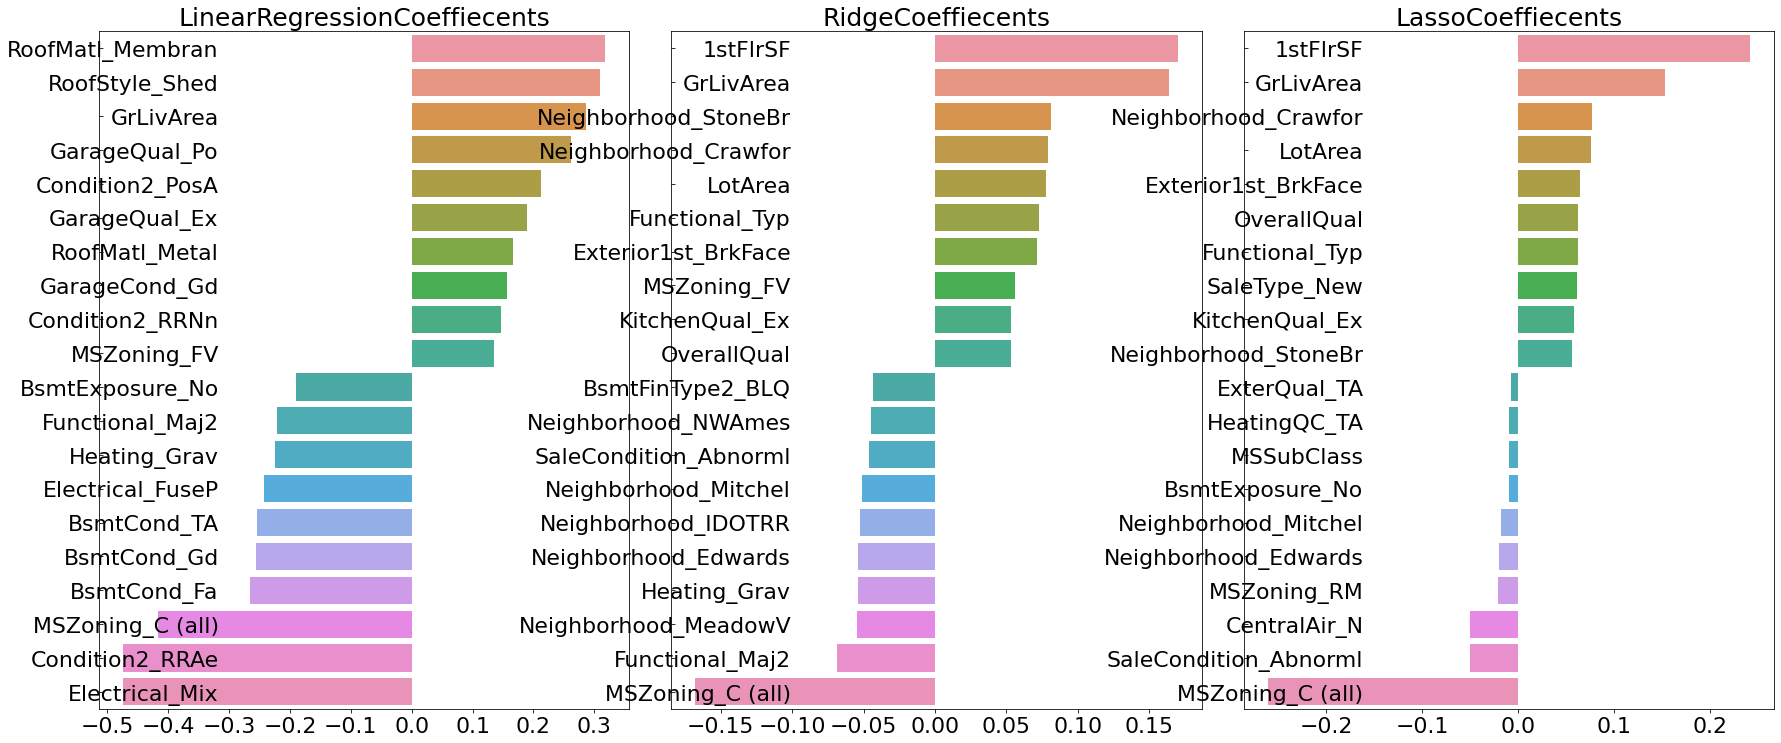

In [24]:
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
ridge_reg = Ridge(alpha = 8)
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso(alpha = 0.001)
lasso_reg.fit(X_train, y_train)

models = [lr_reg, ridge_reg,lasso_reg ]
get_rmses(models)

models = [lr_reg, ridge_reg,lasso_reg ]
visualize_coefficient(models)

### 회귀트리 모델 실행

In [25]:
from xgboost import XGBRegressor

xgb_params = {'n_estimators' : [1000]}
xgb_reg = XGBRegressor(n_estimators = 1000, learning_rate = 0.05, colsample_bytree = 0.5, subsample =0.80)
print_best_params(xgb_reg, xgb_params)

XGBRegressor 5 cv 최적 평균 rmse 값 : 0.1178, 최적 alpha : {'n_estimators': 1000}


In [28]:
from lightgbm import LGBMRegressor

lgbm_params = {'n_estimators' : [1000]}
lgbm_reg = LGBMRegressor(n_estimators = 1000, learning_rate = 0.05, num_leaves = 4, subsample =0.6, colsample_bytree = 0.4, reg_lambda = 10, n_jobs = -1)
print_best_params(lgbm_reg, lgbm_params)

LGBMRegressor 5 cv 최적 평균 rmse 값 : 0.1163, 최적 alpha : {'n_estimators': 1000}


### 최종 예측

In [33]:
def get_rmse_pred(preds):
    for key in preds.keys():
        pred_value = preds[key]
        mse = mean_squared_error(y_test, pred_value)
        rmse = np.sqrt(mse)
        print("{0} 모델의 rmse : {1}".format(key, rmse))

In [34]:

ridge_reg = Ridge(alpha = 8)
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso(alpha = 0.001)
lasso_reg.fit(X_train, y_train)

ridge_pred = ridge_reg.predict(X_test)
lasso_pred = lasso_reg.predict(X_test)

pred = 0.4 * ridge_pred + 0.6 * lasso_pred
preds = {'최종혼합' : pred,
        'ridge' : ridge_pred,
        'lasso' : lasso_pred}

get_rmse_pred(preds)

최종혼합 모델의 rmse : 0.10007930884470502
ridge 모델의 rmse : 0.1034517754660325
lasso 모델의 rmse : 0.10024170460890021


In [35]:
xgb_reg = XGBRegressor(n_estimators = 1000, learning_rate = 0.05, colsample_bytree = 0.5, subsample =0.80)
lgbm_reg = LGBMRegressor(n_estimators = 1000, learning_rate = 0.05, num_leaves = 4, subsample =0.6, colsample_bytree = 0.4, reg_lambda = 10, n_jobs = -1)
xgb_reg.fit(X_train, y_train)
lgbm_reg.fit(X_train, y_train)
xgb_pred = xgb_reg.predict(X_test)
lgbm_pred = lgbm_reg.predict(X_test)

pred = 0.5 * xgb_pred + 0.5 * lgbm_pred
preds = {'최종혼합' : pred,
        'xgb' : xgb_pred,
        'lgbm' : lgbm_pred}

get_rmse_pred(preds)

최종혼합 모델의 rmse : 0.10170077353447762
xgb 모델의 rmse : 0.10738295638346222
lgbm 모델의 rmse : 0.10382510019327311


### 스태킹 앙상블 모델

In [36]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds) : 
    kf = KFold(n_splits = n_folds, shuffle = False, random_state = 0)
    
    train_fold_pred = np.zeros((X_train_n.shape[0],1))
    test_pred = np.zeros((X_test_n.shape[0],n_folds))
    print(model.__class__.__name__,' model 시작')
    
    for folder_counter, (train_index, valid_index) in enumerate(kf.split(X_train_n)):
        print("\t 폴드 세트", folder_counter, ' 시작')
        X_tr = X_train_n[train_index]
        y_tr = y_train_n[train_index]
        X_te = X_train_n[valid_index]
        
        model.fit(X_tr,y_tr)
        
        train_fold_pred[valid_index, :] = model.predict(X_te).reshape(-1,1)
        test_pred[:,folder_counter] = model.predict(X_test_n)
        
    test_pred_mean = np.mean(test_pred, axis = 1).reshape(-1,1)
    return train_fold_pred, test_pred_mean

In [37]:
X_train_n = X_train.values
X_test_n = X_test.values
y_train_n = y_train.values

ridge_train, ridge_test = get_stacking_base_datasets(ridge_reg, X_train_n, y_train_n, X_test_n, 5)
lasso_train, lasso_test = get_stacking_base_datasets(lasso_reg, X_train_n, y_train_n, X_test_n, 5)
xgb_train, xgb_test = get_stacking_base_datasets(xgb_reg, X_train_n, y_train_n, X_test_n, 5)
lgbm_train, lgbm_test = get_stacking_base_datasets(lgbm_reg, X_train_n, y_train_n, X_test_n, 5)

C:\Users\sbpark\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
C:\Users\sbpark\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
C:\Users\sbpark\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


Ridge  model 시작
	 폴드 세트 0  시작
	 폴드 세트 1  시작
	 폴드 세트 2  시작
	 폴드 세트 3  시작
	 폴드 세트 4  시작
Lasso  model 시작
	 폴드 세트 0  시작
	 폴드 세트 1  시작
	 폴드 세트 2  시작
	 폴드 세트 3  시작
	 폴드 세트 4  시작
XGBRegressor  model 시작
	 폴드 세트 0  시작
	 폴드 세트 1  시작
	 폴드 세트 2  시작
	 폴드 세트 3  시작
	 폴드 세트 4  시작
LGBMRegressor  model 시작
	 폴드 세트 0  시작
	 폴드 세트 1  시작
	 폴드 세트 2  시작
	 폴드 세트 3  시작
	 폴드 세트 4  시작


In [39]:
Stack_final_X_train = np.concatenate((ridge_train,lasso_train,xgb_train,lgbm_train), axis = 1)
Stack_final_X_test = np.concatenate((ridge_test,lasso_test,xgb_test,lgbm_test), axis = 1)

meta_model_lasso = Lasso(alpha = 0.0005)

meta_model_lasso.fit(Stack_final_X_train, y_train)
final = meta_model_lasso.predict(Stack_final_X_test)
mse = mean_squared_error(y_test, final)
rmse = np.sqrt(mse)

print("스태킹 회귀모델의 최종 rmse 값은 : ", rmse)

스태킹 회귀모델의 최종 rmse 값은 :  0.09799152965189699
